<a href="https://colab.research.google.com/github/juno2856/deeplearning/blob/master/NLP/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_20220523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One hot encoding실습

In [1]:
import numpy as np

In [2]:
# 입력 문장 (모델 입력)
raw_inputs = [
              "나는 학생 입니다",
              "나는 좋은 선생님 입니다",
              "당신은 매우 좋은 선생님 입니다"
]

#정답 학생(1) 기타(0)
raw_labels = [1,0,0]

In [3]:
words = []
for s in raw_inputs:
  words.extend(s.split())

In [4]:
print(words)

['나는', '학생', '입니다', '나는', '좋은', '선생님', '입니다', '당신은', '매우', '좋은', '선생님', '입니다']


In [5]:
# 중복 단어 제거
words = list(dict.fromkeys(words))

In [6]:
print(words)

['나는', '학생', '입니다', '좋은', '선생님', '당신은', '매우']


In [7]:
word_to_id = {"<PAD>" : 0, "<UNK>" : 1}

for w in words:
  word_to_id[w] = len(word_to_id)
  print(word_to_id)


{'<PAD>': 0, '<UNK>': 1, '나는': 2}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '당신은': 7}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '당신은': 7, '매우': 8}


In [8]:
word_to_id.items()

dict_items([('<PAD>', 0), ('<UNK>', 1), ('나는', 2), ('학생', 3), ('입니다', 4), ('좋은', 5), ('선생님', 6), ('당신은', 7), ('매우', 8)])

In [9]:
id_to_words = {i : w for w,i in word_to_id.items()}

In [10]:
print(id_to_words)

{0: '<PAD>', 1: '<UNK>', 2: '나는', 3: '학생', 4: '입니다', 5: '좋은', 6: '선생님', 7: '당신은', 8: '매우'}


In [11]:
train_inputs = []
for s in raw_inputs:
  row = [word_to_id[w] for w in s.split()]

  #padding
  row += [0] * (5-len(row))
  train_inputs.append(row)

train_inputs = np.array(train_inputs)
print(train_inputs)

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


"나는 학생 입니다"

"나는 좋은 선생님 입니다"

"당신은 매우 좋은 선생님 입니다"

In [12]:
train_inputs.shape

(3, 5)

In [13]:
# one_hot matrix 생성
onehot_matrix = np.eye(len(word_to_id))
print(onehot_matrix)

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [14]:
train_onehot = onehot_matrix[train_inputs]
print(train_onehot)

[[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]]]


In [15]:
# 단어장 낭비
# 단어들과의 관계가 모호함

In [16]:
train_onehot.shape

(3, 5, 9)

In [17]:
print(np.argmax(train_onehot, axis = -1)) ## (3,5,9) 중 9를 기준으로 argmax 해줘

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [18]:
x = np.argmax(train_onehot, axis = -1)

In [19]:
print(x)

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [20]:
import tensorflow as tf
import tensorflow.keras.layers as L

In [21]:
x_len = train_onehot.shape

In [22]:
print(x_len)

(3, 5, 9)


In [23]:
inp = tf.convert_to_tensor(x, dtype = tf.int32)
inp_len = tf.convert_to_tensor(x_len, dtype = tf.int32)

In [24]:
print(inp)
print(inp_len)

tf.Tensor(
[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]], shape=(3, 5), dtype=int32)
tf.Tensor([3 5 9], shape=(3,), dtype=int32)


In [25]:
inp, inp_len

(<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
 array([[2, 3, 4, 0, 0],
        [2, 5, 6, 4, 0],
        [7, 8, 5, 6, 4]], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 5, 9], dtype=int32)>)

In [26]:
vocab_size = 1000
dim = 3
embed = L.Embedding(vocab_size,dim)

In [27]:
# Embedding 벡터화/ 3차원으로 단어를 줄임 원래는 9

In [28]:
embed(inp) # [[나는]/[학생]/[입니다]/[0]/[0]] 

<tf.Tensor: shape=(3, 5, 3), dtype=float32, numpy=
array([[[-0.01377134,  0.020596  , -0.00447585],
        [-0.01042675,  0.018038  , -0.01222377],
        [ 0.04746716, -0.04194029,  0.0424747 ],
        [ 0.03713474, -0.01147256,  0.03805529],
        [ 0.03713474, -0.01147256,  0.03805529]],

       [[-0.01377134,  0.020596  , -0.00447585],
        [ 0.03498605,  0.02027135, -0.0228272 ],
        [ 0.00611824,  0.02324781, -0.02459492],
        [ 0.04746716, -0.04194029,  0.0424747 ],
        [ 0.03713474, -0.01147256,  0.03805529]],

       [[ 0.01441821, -0.01875176,  0.02144097],
        [ 0.03856098,  0.01353032, -0.01130164],
        [ 0.03498605,  0.02027135, -0.0228272 ],
        [ 0.00611824,  0.02324781, -0.02459492],
        [ 0.04746716, -0.04194029,  0.0424747 ]]], dtype=float32)>

# word2vec
https://dreamgonfly.github.io/blog/word2vec-explained/

In [24]:
from nltk.corpus import abc
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
corpus = abc.sents()

In [26]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [27]:
print('코퍼스의 크기 :', len(corpus))

코퍼스의 크기 : 29059


In [28]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = corpus, size = 100, window = 5, min_count = 5, workers = 4, sg=0)
# size = 워드 벡터의 특징 값, 임베딩 된 벡터의 차원
# window = context window의 크기 (중심단어 앞뒤로 n개씩)
# min_count = 단어의 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg =0은 CBOW, 1은 Skip_gram

In [34]:
# word2vec = 입력한 단어에 대해서 가장 유사한 단어들을 출력하는 model.wv.most_similar을 지원합니다.
model_result = model.wv.most_similar('man')

In [37]:
print(model_result)

[('woman', 0.9333946108818054), ('Bang', 0.9241726398468018), ('asteroid', 0.9185928702354431), ('third', 0.9184460639953613), ('skull', 0.9135705828666687), ('rally', 0.9093400835990906), ('dinosaur', 0.9043806195259094), ('infant', 0.9021029472351074), ('baby', 0.9013645648956299), ('dog', 0.9000855684280396)]


In [38]:
from gensim.models import KeyedVectors

# 저장
model.wv.save_word2vec_format('./w2v')

In [39]:
loaded_model = KeyedVectors.load_word2vec_format('./w2v')
print('모델 load 완료')

모델 load 완료


In [40]:
loaded_model.wv.most_similar('man')
print(model_result)

[('woman', 0.9333946108818054), ('Bang', 0.9241726398468018), ('asteroid', 0.9185928702354431), ('third', 0.9184460639953613), ('skull', 0.9135705828666687), ('rally', 0.9093400835990906), ('dinosaur', 0.9043806195259094), ('infant', 0.9021029472351074), ('baby', 0.9013645648956299), ('dog', 0.9000855684280396)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [41]:
loaded_model.most_similar('overacting')

KeyError: ignored

In [42]:
loaded_model.most_similar('memory')

[('video', 0.9692909717559814),
 ('lifting', 0.9692240953445435),
 ('structures', 0.9681507349014282),
 ('infection', 0.9678928256034851),
 ('semen', 0.9675449728965759),
 ('chasing', 0.9674761891365051),
 ('springs', 0.9662615060806274),
 ('jolt', 0.9659984111785889),
 ('movie', 0.9659576416015625),
 ('protective', 0.9656355381011963)]

# word2vec

# abc 뉴스데이터로 word2vec

## 한국어 word2vec 만들기


In [43]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 412 kB/s 
     |████████████████████████████████| 453 kB 67.0 MB/s 


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [58]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f5e2d785e90>)

In [59]:
train_data = pd.read_table('ratings.txt')

In [60]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [61]:
print(len(train_data))

200000


In [62]:
#Null값의 존재 유무확인
print(train_data.isnull().values.any())

True


In [63]:
#Null값이 존재하는 행 제거
train_data = train_data.dropna(how ='any')
print(train_data.isnull().values.any())

False


In [64]:
print(len(train_data))

199992


In [65]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]',"")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [66]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1


In [57]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [67]:
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
  temp_x = okt.morphs(sentence, stem = True)
  temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
  tokenized_data.append(temp_x)

리뷰의 최대 길이 : 68
리뷰의 평균 길이 : 10.669446777871116


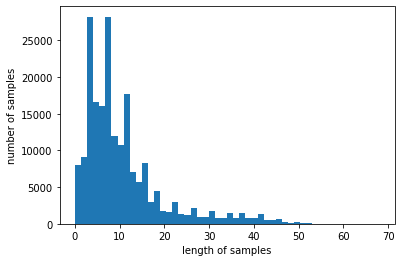

In [69]:
# 리뷰의 길이 분포 확인
print('리뷰의 최대 길이 :', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [70]:
from gensim.models import word2vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count=5, workers = 4, sg =0)

In [71]:
model.wv.vectors.shape

(17947, 100)

In [72]:
print(model.wv.most_similar('최민식'))

[('안성기', 0.8747641444206238), ('베일', 0.8572328090667725), ('설경구', 0.8508327007293701), ('이정재', 0.8475453853607178), ('한석규', 0.846818745136261), ('크로우', 0.846590518951416), ('류덕환', 0.8458220362663269), ('엄태웅', 0.8445698022842407), ('김명민', 0.8433185815811157), ('윤제문', 0.8420458436012268)]


In [73]:
print(model.wv.most_similar('히어로'))

[('블록버스터', 0.8562540411949158), ('무협', 0.8464078307151794), ('느와르', 0.8462713360786438), ('호러', 0.8394969701766968), ('무비', 0.835593581199646), ('물', 0.8154963850975037), ('슬래셔', 0.8122797608375549), ('좀비', 0.8086165189743042), ('재난영화', 0.801566481590271), ('홍콩', 0.7918068170547485)]


In [74]:
print(model.wv.most_similar('뽀로로'))

[('신자', 0.8238723874092102), ('유로트립', 0.8191801309585571), ('구잘', 0.8131558895111084), ('크리스에반스', 0.8107463121414185), ('토마토', 0.8067117929458618), ('유희왕', 0.801209568977356), ('어린이날', 0.7995465993881226), ('긔', 0.798906683921814), ('마다가스카', 0.79607093334198), ('서동요', 0.7949516177177429)]


In [75]:
print(model.wv.most_similar('영화'))

[('독립영화', 0.630764365196228), ('애니', 0.5950890779495239), ('공포영화', 0.5922656059265137), ('이영화', 0.580421507358551), ('액션영화', 0.5745755434036255), ('애니메이션', 0.5734673142433167), ('영화로', 0.5610737800598145), ('다큐', 0.5569882392883301), ('작품', 0.5400457978248596), ('수작', 0.5327576994895935)]


## 사전에 훈련된 워드 임베딩(한국어)


In [2]:
import gensim
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/자연어처리/dataset/ko.bin')


In [77]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print(model)

Word2Vec(vocab=30185, size=200, alpha=0.025)


In [4]:
result = model.wv.most_similar('강아지',topn = 50)
result

[('고양이', 0.7290452718734741),
 ('거위', 0.7185635566711426),
 ('토끼', 0.7056223154067993),
 ('멧돼지', 0.6950401067733765),
 ('엄마', 0.6934334635734558),
 ('난쟁이', 0.6806551218032837),
 ('한마리', 0.6770296096801758),
 ('아가씨', 0.6750352382659912),
 ('아빠', 0.6729634404182434),
 ('목걸이', 0.6512460708618164),
 ('까마귀', 0.6500682830810547),
 ('아주머니', 0.6432187557220459),
 ('독사', 0.6389124393463135),
 ('고슴도치', 0.6313384771347046),
 ('거북이', 0.6252505779266357),
 ('돼지', 0.6222692131996155),
 ('앵무새', 0.6218831539154053),
 ('개구리', 0.6218565702438354),
 ('당나귀', 0.6206705570220947),
 ('송아지', 0.6165446043014526),
 ('구미호', 0.615827202796936),
 ('메두사', 0.6134721040725708),
 ('사냥개', 0.6131488084793091),
 ('악어', 0.6128274202346802),
 ('뱀파이어', 0.6126487255096436),
 ('맹수', 0.609540581703186),
 ('갈기', 0.6087672114372253),
 ('아저씨', 0.6054108142852783),
 ('바구니', 0.6049458980560303),
 ('샴푸', 0.6020784974098206),
 ('잠자리', 0.6012549996376038),
 ('요괴', 0.6010540127754211),
 ('기러기', 0.6004207134246826),
 ('아기', 0.6002471446

## 사전 훈련된 워드 임베딩 (영어)

In [1]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/자연어처리/dataset/GoogleNews-vectors-negative300.bin.gz', binary = True)

In [ ]:
# del model

In [6]:
print(model.vectors.shape) # 300만개의 단어와 각 단어 차원이 300차원

(3000000, 300)


In [7]:
print(model.similarity('this', 'is'))

0.40797037


In [8]:
print(model.similarity('post', 'book'))

0.057204384


In [9]:
print(model['book']) # 300차원

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [2]:
model.most_similar('memory')

[('Memory', 0.6844282150268555),
 ('memories', 0.6138081550598145),
 ('Added_Tarbet', 0.5560144186019897),
 ('Earliest_sporting', 0.5375796556472778),
 ('Flash_memory', 0.5318928360939026),
 ('foam_mattress_topper', 0.5253582000732422),
 ('flash_memory', 0.5221431255340576),
 ('remembering', 0.5171269178390503),
 ('SODIMM_modules', 0.5119421482086182),
 ('components_microprocessors_CPUs', 0.5007408857345581)]

##FastText

n = 3

<;apple> 

<ap, app, ppl, ple, le>

In [29]:
from gensim.models import FastText

In [30]:
model = FastText(corpus, size = 100, window = 5, min_count = 5, workers =4, sg =1)

In [31]:
from gensim.models import Word2Vec
model_wv = Word2Vec(sentences = corpus, size = 100, window = 5, min_count = 5, workers =4, sg =0)

In [32]:
model_wv.wv.most_similar('electrofishing') # word2vec

KeyError: ignored

In [33]:
model.wv.most_similar('electrofishing') # FastText

[('electric', 0.892590343952179),
 ('electricity', 0.874626636505127),
 ('electrode', 0.8743335008621216),
 ('electrodes', 0.8705457448959351),
 ('electrons', 0.8399685621261597),
 ('electronics', 0.8399053812026978),
 ('electronic', 0.8346332907676697),
 ('electron', 0.8263611793518066),
 ('aircraft', 0.8195280432701111),
 ('electrical', 0.8109595775604248)]

##Glove

In [15]:
!pip install glove_python_binary

     |████████████████████████████████| 948 kB 5.2 MB/s 


In [16]:
from glove import Corpus, Glove

In [17]:
Corpus = Corpus()

In [18]:
Corpus.fit(corpus, window = 5)

In [19]:
glove = Glove(no_components = 100, learning_rate = 0.05)

In [20]:
glove.fit(Corpus.matrix, epochs = 10, no_threads = 4, verbose = True)
glove.add_dictionary(Corpus.dictionary)

Performing 10 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [21]:
print(glove.most_similar('man'))

[('dog', 0.9726651552144322), ('child', 0.9672690041405155), ('person', 0.9401195259887292), ('patient', 0.9362737077137876)]


In [22]:
print(glove.most_similar('boy'))

[('harmless', 0.9870657263265603), ('negotiation', 0.9866890753501558), ('cocker', 0.9865652161508454), ('vertebrate', 0.9863775778088475)]


In [23]:
print(glove.most_similar('university'))

[('moon', 0.9749729618495677), ('state', 0.9667609459545566), ('nation', 0.9645485013696902), ('biggest', 0.9544827533201575)]
